In [1]:
import pandas as pd
import boto

# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/CanonicalCorrelationAnalysisData.csv')

In [15]:
from sklearn.cross_decomposition import CCA

# Split the data in X and Y
X = data[['PsychTest1',	'PsychTest2', 'YrsEdu', 'IQ', 'HrsTrn', 'HrsWrk']]
Y = data[['ClientSat',	'SuperSat',	'ProjCompl']]

# Instantiate the Canonical Correlation Analysis with 2 components
my_cca = CCA(n_components=3)

# Fit the model
my_cca.fit(X, Y)

CCA(n_components=3)

In [17]:
xrot

array([[ 0.03645432,  0.69207283, -0.69432569],
       [ 0.32144499,  0.54504923,  0.70960884],
       [ 0.03606292,  0.02205264, -0.17857434],
       [ 0.07993972,  0.11464328,  0.1565755 ],
       [ 0.00754909,  0.18527379, -0.12043048],
       [ 0.9421233 , -0.48670937,  0.02574528]])

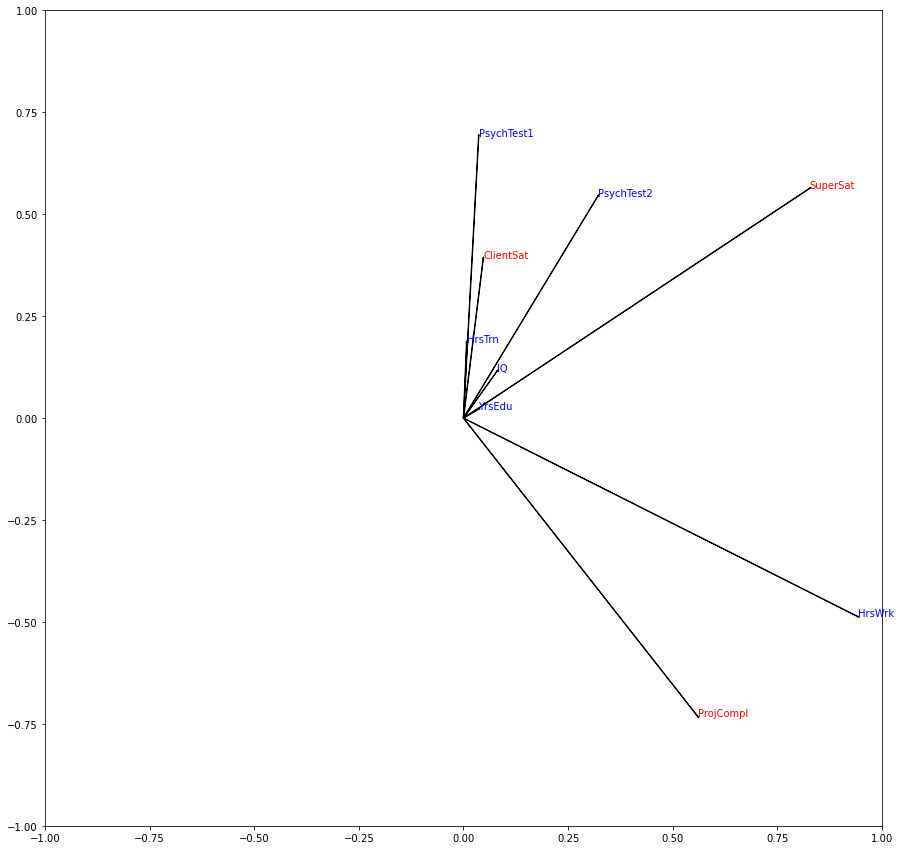

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the rotation matrices
xrot = my_cca.x_rotations_
yrot = my_cca.y_rotations_

# Put them together in a numpy matrix
xyrot = np.vstack((xrot,yrot))

nvariables = xyrot.shape[0]

plt.figure(figsize=(15, 15))
plt.xlim((-1,1))
plt.ylim((-1,1))

# Plot an arrow and a text label for each variable
for var_i in range(nvariables):
  x = xyrot[var_i,0]
  y = xyrot[var_i,1]

  plt.arrow(0,0,x,y)
  plt.text(x,y,data.columns[var_i], color='red' if var_i >= 6 else 'blue')

plt.show()